# Forecasting Best Model(s) 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA, ARIMAResults
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

In [2]:
zip_results = pd.read_csv('../data/zip_code_notes.csv').set_index('Name')
zip_results

,Min. differencing for stationarity,Baseline ARMA,Baseline AIC,Best AUTOArima on train set,AIC,RMSE-last year of train set vs. model forecast for same period,RMSE-test set vs. forecast of train set one year,Percent RMSE error
Name,,,,,,,,
Uptown (70115),1,"(1,1)",4391.0,"(0,2,0)",4210.1,23203.68,42103.65,7.1
Lower Garden District (70130),2,"(1,0)",4917.0,"(0,2,0)",4396.3,23459.78,46684.81,8.0
Audubon (70118),1,"(2,1)",4280.0,"(1,1,2)",4548.0,8023.76,186895.73,45.6
Metairie (70005),2,"(2,2)",3939.6,"(1,1,1)",4279.7,3394.47,9778.85,3.4
Aurora (70131),3,"(1,1)",4296.8,"(1,1,1)",4099.7,1320.68,6509.78,3.8


In [3]:
zip_results.sort_values(by=['AIC'])

,Min. differencing for stationarity,Baseline ARMA,Baseline AIC,Best AUTOArima on train set,AIC,RMSE-last year of train set vs. model forecast for same period,RMSE-test set vs. forecast of train set one year,Percent RMSE error
Name,,,,,,,,
Aurora (70131),3,"(1,1)",4296.8,"(1,1,1)",4099.7,1320.68,6509.78,3.8
Uptown (70115),1,"(1,1)",4391.0,"(0,2,0)",4210.1,23203.68,42103.65,7.1
Metairie (70005),2,"(2,2)",3939.6,"(1,1,1)",4279.7,3394.47,9778.85,3.4
Lower Garden District (70130),2,"(1,0)",4917.0,"(0,2,0)",4396.3,23459.78,46684.81,8.0
Audubon (70118),1,"(2,1)",4280.0,"(1,1,2)",4548.0,8023.76,186895.73,45.6


- Lowest AIC is Aurora  
- Next lowest is Uptown

In [4]:
zip_results.sort_values(by=['RMSE-test set vs. forecast of train set one year'])

,Min. differencing for stationarity,Baseline ARMA,Baseline AIC,Best AUTOArima on train set,AIC,RMSE-last year of train set vs. model forecast for same period,RMSE-test set vs. forecast of train set one year,Percent RMSE error
Name,,,,,,,,
Aurora (70131),3,"(1,1)",4296.8,"(1,1,1)",4099.7,1320.68,6509.78,3.8
Metairie (70005),2,"(2,2)",3939.6,"(1,1,1)",4279.7,3394.47,9778.85,3.4
Uptown (70115),1,"(1,1)",4391.0,"(0,2,0)",4210.1,23203.68,42103.65,7.1
Lower Garden District (70130),2,"(1,0)",4917.0,"(0,2,0)",4396.3,23459.78,46684.81,8.0
Audubon (70118),1,"(2,1)",4280.0,"(1,1,2)",4548.0,8023.76,186895.73,45.6


- Lowest RMSE is Aurora  
- Next lowest is Metairie, then Uptown  

In [5]:
zip_results.sort_values(by=['Percent RMSE error'])

,Min. differencing for stationarity,Baseline ARMA,Baseline AIC,Best AUTOArima on train set,AIC,RMSE-last year of train set vs. model forecast for same period,RMSE-test set vs. forecast of train set one year,Percent RMSE error
Name,,,,,,,,
Metairie (70005),2,"(2,2)",3939.6,"(1,1,1)",4279.7,3394.47,9778.85,3.4
Aurora (70131),3,"(1,1)",4296.8,"(1,1,1)",4099.7,1320.68,6509.78,3.8
Uptown (70115),1,"(1,1)",4391.0,"(0,2,0)",4210.1,23203.68,42103.65,7.1
Lower Garden District (70130),2,"(1,0)",4917.0,"(0,2,0)",4396.3,23459.78,46684.81,8.0
Audubon (70118),1,"(2,1)",4280.0,"(1,1,2)",4548.0,8023.76,186895.73,45.6


- Lowest percent RMSE error is Metairie  
- Next Aurora, then Uptown  

In [6]:
zip_results.sort_values(by=['Percent RMSE error']).iloc[:,[4, -2, -1]]

,AIC,RMSE-test set vs. forecast of train set one year,Percent RMSE error
Name,,,
Metairie (70005),4279.7,9778.85,3.4
Aurora (70131),4099.7,6509.78,3.8
Uptown (70115),4210.1,42103.65,7.1
Lower Garden District (70130),4396.3,46684.81,8.0
Audubon (70118),4548.0,186895.73,45.6


# Model Full Data (Aurora) 

In [7]:
# Load dataset
aurora = pd.read_csv('../data/aurora.csv').set_index('Unnamed: 0')
aurora.index.name = None
aurora.index = pd.to_datetime(aurora.index, format='%Y-%m')
aurora.index = pd.DatetimeIndex(aurora.index, freq='MS')
aurora = aurora.rename(columns={'70131': 'Aurora'})

In [8]:
# Fit data to best model
aurora_arima_smx = sm.tsa.statespace.SARIMAX(aurora, 
                                             order=(1,1,1), 
                                             enforce_stationarity=True, 
                                             enforce_invertibility=False)
aurora_output = aurora_arima_smx.fit()

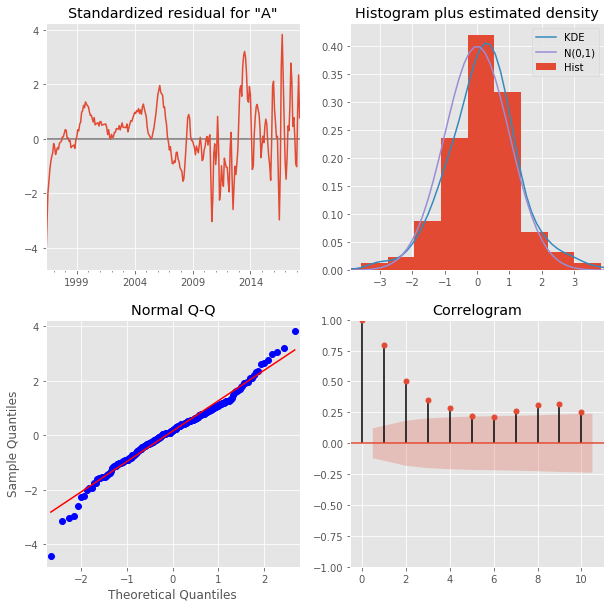

In [9]:
aurora_output.plot_diagnostics(figsize=(10, 10))
plt.show()

In [10]:
aurora.tail(3)

,Aurora
2018-02-01,165000.0
2018-03-01,166900.0
2018-04-01,167800.0


## Plot forecast

In [11]:
prediction = aurora_output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

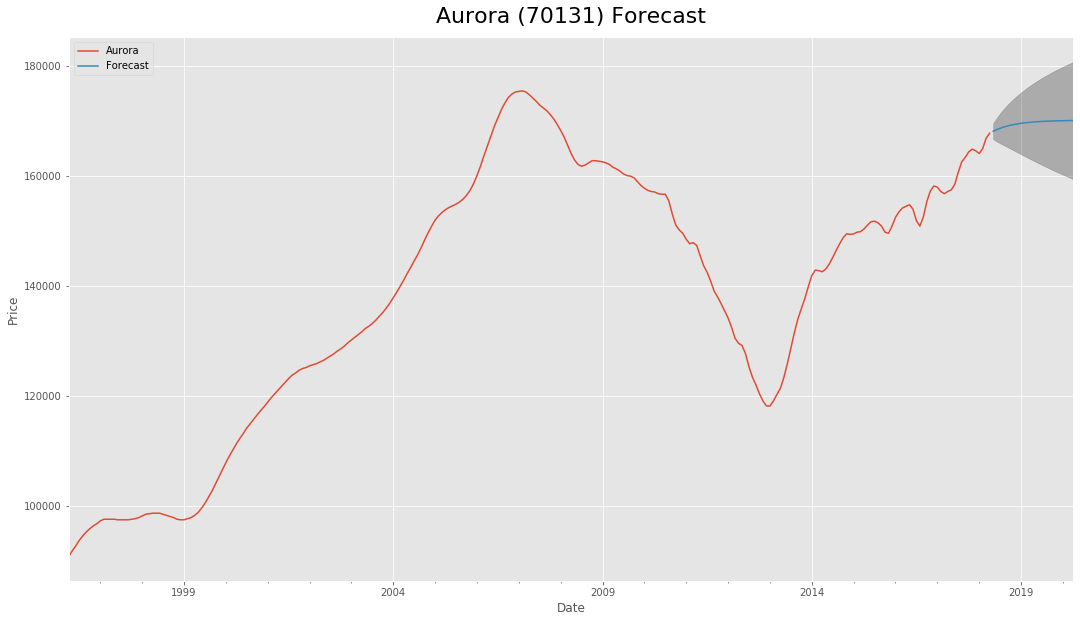

In [12]:
ax = aurora.plot(label='observed', figsize=(18,10))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.title("Aurora (70131) Forecast", fontsize=22, pad=14)
plt.legend(loc="upper left")

plt.savefig(r'../images/aurora_full_model_forecast.png')

plt.show()

## Find numerical forecasts

In [13]:
aurora_output.forecast(24)[-1]

170106.12190599693

In [14]:
aurora_two_yr_forecast = round(aurora_output.forecast(24)[-1], 1)
aurora_two_yr_forecast

170106.1

Aurora two-year ROI

In [15]:
aurora_last_price = aurora.iloc[-1]['Aurora']
aurora_last_price

167800.0

In [16]:
aurora_ROI = (((aurora_two_yr_forecast - aurora_last_price) / aurora_last_price) * 100)
aurora_ROI

1.3743146603098964

In [17]:
aurora_ROI = f"{round(aurora_ROI, 2)}%"
aurora_ROI

'1.37%'

Very poor return on investment. Will look at Uptown.

### Standard Deviation (to Measure Risk)

In [18]:
upper = pred_conf.iloc[:,1]
lower = pred_conf.iloc[:,0]

In [19]:
upper

2018-05-01    169580.209589
2018-06-01    170577.556992
2018-07-01    171429.266085
2018-08-01    172192.446769
2018-09-01    172889.843421
2018-10-01    173534.045400
2018-11-01    174133.375845
2018-12-01    174693.953783
2019-01-01    175220.581452
2019-02-01    175717.184930
2019-03-01    176187.058839
2019-04-01    176633.015507
2019-05-01    177057.483345
2019-06-01    177462.576147
2019-07-01    177850.144580
2019-08-01    178221.816091
2019-09-01    178579.026836
2019-10-01    178923.047853
2019-11-01    179255.006879
2019-12-01    179575.906794
2020-01-01    179886.641346
2020-02-01    180188.008653
2020-03-01    180480.722856
2020-04-01    180765.424224
Freq: MS, Name: upper Aurora, dtype: float64

In [20]:
lower

2018-05-01    166716.454281
2018-06-01    166312.807702
2018-07-01    165967.053755
2018-08-01    165635.050859
2018-09-01    165305.106317
2018-10-01    164974.049071
2018-11-01    164641.582308
2018-12-01    164308.427085
2019-01-01    163975.610318
2019-02-01    163644.173569
2019-03-01    163315.055665
2019-04-01    162989.052048
2019-05-01    162666.808866
2019-06-01    162348.832485
2019-07-01    162035.505151
2019-08-01    161727.102318
2019-09-01    161423.809490
2019-10-01    161125.737624
2019-11-01    160832.936719
2019-12-01    160545.407573
2020-01-01    160263.111776
2020-02-01    159985.980135
2020-03-01    159713.919699
2020-04-01    159446.819588
Freq: MS, Name: lower Aurora, dtype: float64

In [21]:
arr = np.array([upper, lower])

In [22]:
aurora_std = round(np.std(arr), 1)
aurora_std

7239.0

In [23]:
aurora_months_forecasted = 24

# Model Full Data (uptown) 

In [24]:
# Load dataset
uptown = pd.read_csv('../data/uptown.csv').set_index('Unnamed: 0')
uptown.index.name = None
uptown.index = pd.to_datetime(uptown.index, format='%Y-%m')
uptown.index = pd.DatetimeIndex(uptown.index, freq='MS')
uptown = uptown.rename(columns={'70115': 'Uptown'})

In [25]:
uptown_arima_smx = sm.tsa.statespace.SARIMAX(uptown,
                                        order=(0,2,0), 
                                        enforce_stationarity=True, 
                                        enforce_invertibility=False)
uptown_output = uptown_arima_smx.fit()

In [26]:
prediction = uptown_output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

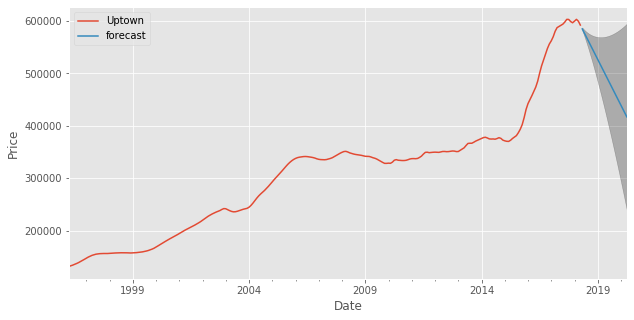

In [27]:
ax = uptown.plot(label='observed', figsize=(10,5))
prediction.predicted_mean.plot(ax=ax, label='forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend(loc="upper left")
plt.show()

In [28]:
# Try 12 steps instead

prediction = uptown_output.get_forecast(steps=12)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

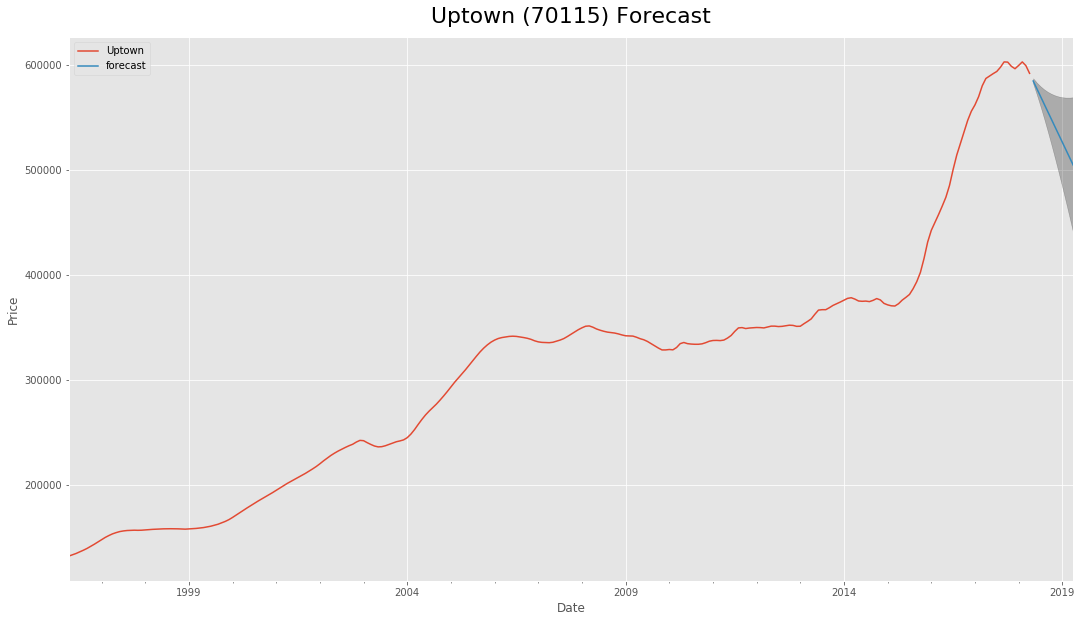

In [29]:
ax = uptown.plot(label='observed', figsize=(18, 10))
prediction.predicted_mean.plot(ax=ax, label='forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend(loc="upper left")
plt.title("Uptown (70115) Forecast", fontsize=22, pad=14)
plt.legend(loc="upper left")

plt.savefig(r'../images/uptown_full_model_forecast.png')

## Find numerical forecasts

In [30]:
uptown_output.forecast(12)[-1]

504700.0

In [31]:
uptown_one_yr_forecast = round(uptown_output.forecast(12)[-1], 1)
uptown_months_forecasted = 12
uptown_one_yr_forecast

504700.0

uptown one-year ROI

In [32]:
uptown_last_price = uptown.iloc[-1]['Uptown']
uptown_last_price

592300.0

In [33]:
uptown_ROI = (((uptown_one_yr_forecast - uptown_last_price) / uptown_last_price) * 100)
uptown_ROI

-14.789802464967078

In [34]:
uptown_ROI = f"{round(uptown_ROI, 3)}%"
uptown_ROI

'-14.79%'

This investment will lose money

### Standard Deviation (to Measure Risk)

In [35]:
upper = pred_conf.iloc[:,1]
lower = pred_conf.iloc[:,0]

In [36]:
arr = np.array([upper, lower])

In [37]:
uptown_std = round(np.std(arr), 1)
uptown_std

43671.8

# Model Full Data (Metairie)

In [38]:
# Load dataset
metairie = pd.read_csv('../data/metairie.csv').set_index('Unnamed: 0')
metairie.index.name = None
metairie.index = pd.to_datetime(metairie.index, format='%Y-%m')
metairie.index = pd.DatetimeIndex(metairie.index, freq='MS')
metairie = metairie.rename(columns={'70005': 'metairie'})

In [39]:
# Fit data to best model
metairie_arima_smx = sm.tsa.statespace.SARIMAX(metairie, 
                                             order=(1,1,1), 
                                             enforce_stationarity=True, 
                                             enforce_invertibility=False)
metairie_output = metairie_arima_smx.fit()

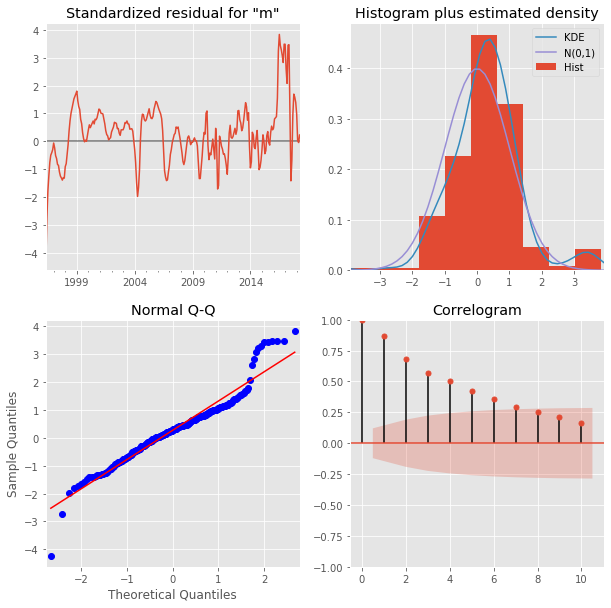

In [40]:
metairie_output.plot_diagnostics(figsize=(10, 10))
plt.show()

In [41]:
metairie.tail(3)

,metairie
2018-02-01,290200.0
2018-03-01,290800.0
2018-04-01,291600.0


In [42]:
prediction = metairie_output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

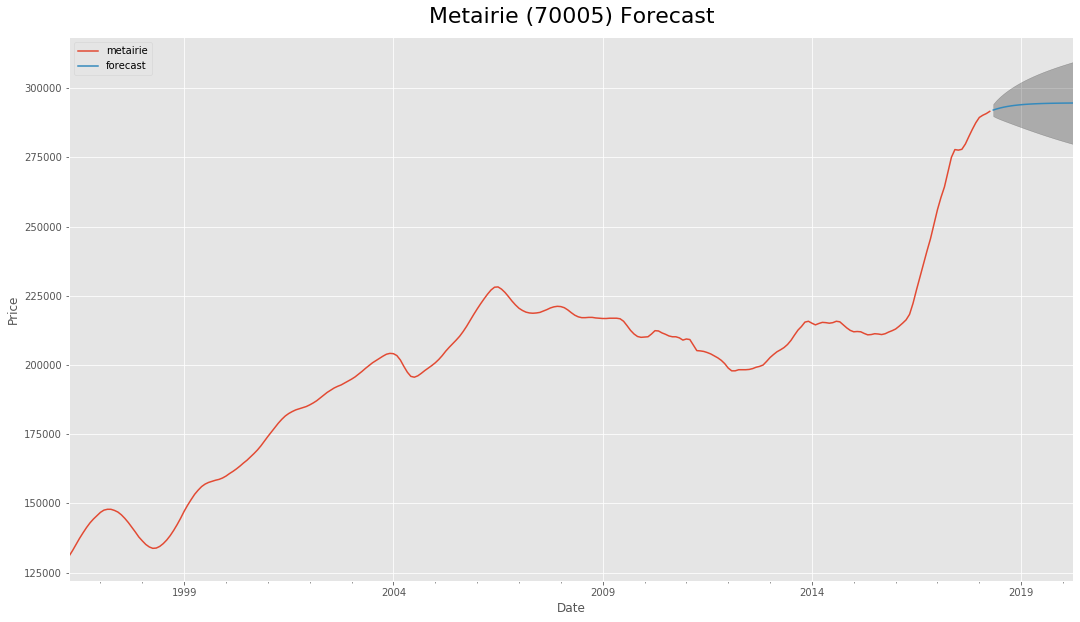

In [43]:
ax = metairie.plot(label='observed', figsize=(18,10))
prediction.predicted_mean.plot(ax=ax, label='forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend(loc="upper left")
plt.title("Metairie (70005) Forecast", fontsize=22, pad=14)
plt.legend(loc="upper left")

plt.savefig(r'../images/metairie_full_model_forecast.png')

## Find numerical forecasts

In [44]:
metairie_output.forecast(24)[-1]

294615.40666841564

In [45]:
metairie_two_yr_forecast = round(metairie_output.forecast(24)[-1], 1)
metairie_two_yr_forecast

294615.4

metairie two-year ROI

In [46]:
metairie_last_price = metairie.iloc[-1]['metairie']
metairie_last_price

291600.0

In [47]:
metairie_ROI = (((metairie_two_yr_forecast - metairie_last_price) / metairie_last_price) * 100)
metairie_ROI

1.034087791495207

In [48]:
metairie_ROI = f"{round(metairie_ROI, 2)}%"
metairie_ROI

'1.03%'

Very poor return on investment.

### Standard Deviation (to Measure Risk)

In [49]:
upper = pred_conf.iloc[:,1]
lower = pred_conf.iloc[:,0]

In [50]:
arr = np.array([upper, lower])

In [51]:
metairie_std = round(np.std(arr), 1)
metairie_std

10225.8

In [52]:
metairie_months_forecasted = 24

# Create Dataframe for Comparison

In [53]:
data ={'Area': ['Aurora', 'Uptown', 'Metairie'],
       'Latest Price': ["${:,.0f}".format(aurora_last_price), "${:,.0f}".format(uptown_last_price), "${:,.0f}".format(metairie_last_price)],
       'Months Forecasted': [aurora_months_forecasted, uptown_months_forecasted, metairie_months_forecasted],
       'Predicted ROI': [aurora_ROI, uptown_ROI, metairie_ROI],
       'STD (Risk)': [aurora_std, uptown_std, metairie_std]
      }

In [54]:
compare_df = pd.DataFrame(data).set_index('Area')
compare_df.index.name = None
compare_df

,Latest Price,Months Forecasted,Predicted ROI,STD (Risk)
Aurora,"$167,800",24,1.37%,7239.0
Uptown,"$592,300",12,-14.79%,43671.8
Metairie,"$291,600",24,1.03%,10225.8


In [55]:
compare_df = compare_df.reindex(['Aurora', 'Metairie', 'Uptown'])
compare_df

,Latest Price,Months Forecasted,Predicted ROI,STD (Risk)
Aurora,"$167,800",24,1.37%,7239.0
Metairie,"$291,600",24,1.03%,10225.8
Uptown,"$592,300",12,-14.79%,43671.8
